# MovieLens Dataset - Ratings Visualization

This notebook explores the **MovieLens** dataset, specifically focusing on the analysis and visualization of user ratings. The MovieLens dataset is a widely used benchmark in recommender system research, particularly in collaborative filtering, where user-item interaction data is critical for making personalized recommendations.

In this notebook, we will visualize key aspects of the ratings data to gain insights into user preferences, movie popularity, and overall rating distributions. These visualizations will provide a deeper understanding of the patterns in the data, which is crucial for improving collaborative filtering algorithms.

### Objectives:
1. Visualize the **distribution of ratings** across all movies.
2. Explore the **number of ratings per movie** and **average rating per movie**.
3. Identify and analyze the **most-rated movies**.
4. Visualize the **number of ratings per user** and **average rating per user**.

First steps, we'll need necessary libraries and modules. These have been stated in **requirements.txt** file, and we can install all stuffs just by one command.

In [19]:
%pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


If all requirements are shown to be already satisfied, you can continue to read the next section. If it starts to install some of the packages, after installation is done, restart kernel of this notebook, then you can proceed.

Now, we'll import these libraries and modules into our code.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Movielens datasets comprise of 4 tables:
  * **links.csv** is used for storing hyperlinks to webpages corresponding to movies' ID. Each entry has 3 attributes: movieId, imdbId (ID of movie on IMDb website), tmdbId (ID of movie on TMDB website).
  * **movies.csv** stores title, genres of each movie. The table has 3 attributes: movieId, title, genres. A movie can have a number of genres, in this table, all genres of a movie is seperated by a | symbol.
  * **ratings.csv** is our heavy focus since collaborative filtering techniques will use primarily this table, which has 4 attributes: userId, movieId, rating, timestamp. Each entry let us know who has rated which movie, what the rating score is and the time when the rating happened.
  * **tags.csv** is not of our focus, since tags are usually employed in different techniques than collaborative filtering. Still, this table has 4 attributes: userId, movieId, tag, timestamp.

We choose ml-latest dataset for its small size which is approriate for demonstration.
Since we are only concerned with movies.csv and ratings.csv, let's load them into our project and view their headers.

In [7]:
ratings = pd.read_csv("../data/ml-latest/ratings.csv")
movies = pd.read_csv("../data/ml-latest/movies.csv")

print("Ratings Dataset:")
display(ratings.head())

print("\nMovies Dataset:")
display(movies.head())

Ratings Dataset:


,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119



Movies Dataset:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


We can also merge these two tables so that it provides better visualization and understandings.

In [10]:
merged_data = pd.merge(ratings, movies, on='movieId')

print("Merged dataset:")
display(merged_data.head(10))

Merged dataset:


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,1225734739,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,110,4.0,1225865086,Braveheart (1995),Action|Drama|War
2,1,158,4.0,1225733503,Casper (1995),Adventure|Children
3,1,260,4.5,1225735204,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
4,1,356,5.0,1225735119,Forrest Gump (1994),Comedy|Drama|Romance|War
5,1,381,3.5,1225734105,When a Man Loves a Woman (1994),Drama|Romance
6,1,596,4.0,1225733524,Pinocchio (1940),Animation|Children|Fantasy|Musical
7,1,1036,5.0,1225735626,Die Hard (1988),Action|Crime|Thriller
8,1,1049,3.0,1225734079,"Ghost and the Darkness, The (1996)",Action|Adventure
9,1,1066,4.0,1225736961,Shall We Dance (1937),Comedy|Musical|Romance


Now, let's see how many users, movies, and ratings occured out there. We'll also calculate average number of ratings per users and movies to see how active users are and which movies have the most judges on this dataset.

In [20]:
total_rating_occurences = ratings.shape[0]
total_rated_movies = ratings['movieId'].nunique()
total_rating_users = ratings['userId'].nunique()

print(f"Total Number of Ratings That Have Been Occured: {total_rating_occurences}")
print(f"Total Number of Rated Movies: {total_rated_movies}")
print(f"Total Number of Active Users Who Has Rate Some Movies: {total_rating_users}")

avg_nratings_per_user = total_rating_occurences / total_rating_users
print(f"Average Number of Rating Occurences per User: {avg_nratings_per_user:.2f}")

avg_nratings_per_movie = total_rating_occurences / total_rated_movies
print(f"Average Number of Rating Occurences per Movie: {avg_nratings_per_movie:.2f}")

Total Number of Ratings That Have Been Occured: 33832162
Total Number of Rated Movies: 83239
Total Number of Active Users Who Has Rate Some Movies: 330975
Average Number of Rating Occurences per User: 102.22
Average Number of Rating Occurences per Movie: 406.45


Clearly, for ml-latest dataset, there are 330,975 users who have rated some movies, and 83,239 movies that have been rated by some users. Those users made 33,832,162 interactions (ratings specifically) with movies. From the results above, we can say that on average, each movielens user has a total of 102.22 times rating some movies, and each movie has been judged 406.45 times. This is pretty impressive.

For the next part, let's draw a histogram to explore the distribution of those ratings.

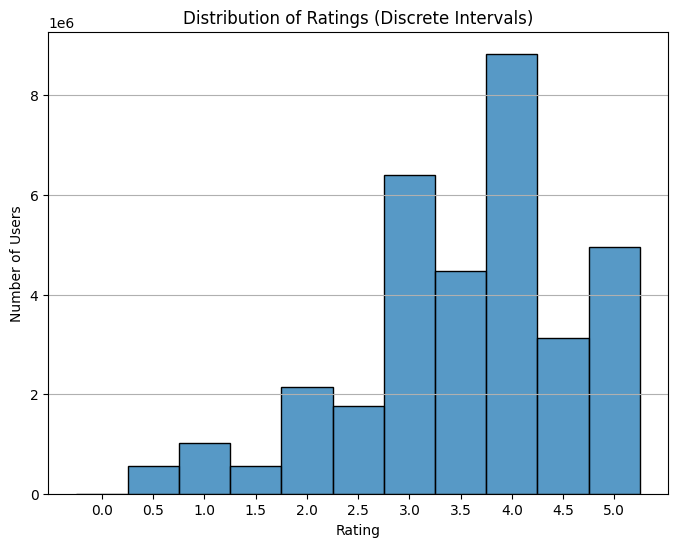

In [18]:
val_bins = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
mid_bins = [-0.25, 0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25]

plt.figure(figsize=(8, 6))
sns.histplot(ratings['rating'], bins=mid_bins, kde=False)

plt.title('Distribution of Ratings (Discrete Intervals)')
plt.xlabel('Rating')
plt.ylabel('Number of Users')

plt.xticks(val_bins)
plt.grid(axis='y')

plt.show()

From the histogram above, we can see that the shape tends to the right, which means that most ratings are on the higher end of rating scale.  
The most popular scores that a user would rate a movie are 4.0 stars, indicating that most movielens people usually rate a movie positively but not too high as 5.0 stars.
The second and third peaks are 3.0 and 5.0 stars. Here, notice the phenomenon in which 3.5 and 4.5 stars (which are the closest to the peak) are not as usual as 3.0 and 5.0 stars, this indicates that most users prefer round-numbered ratings than odd-numbered one.  
As in lower rating scale, all scales below 2.5 stars occupied pretty low number of users (0.0 is not allowed on movielens). It seems the users tend to avoid giving extremely low ratings. This can be the result from both the high quality of movies (which induces users' satisfaction) and user behavior of reluctance to rate harshly.


Next, we'll explore the distribution for number of ratings a movie received.

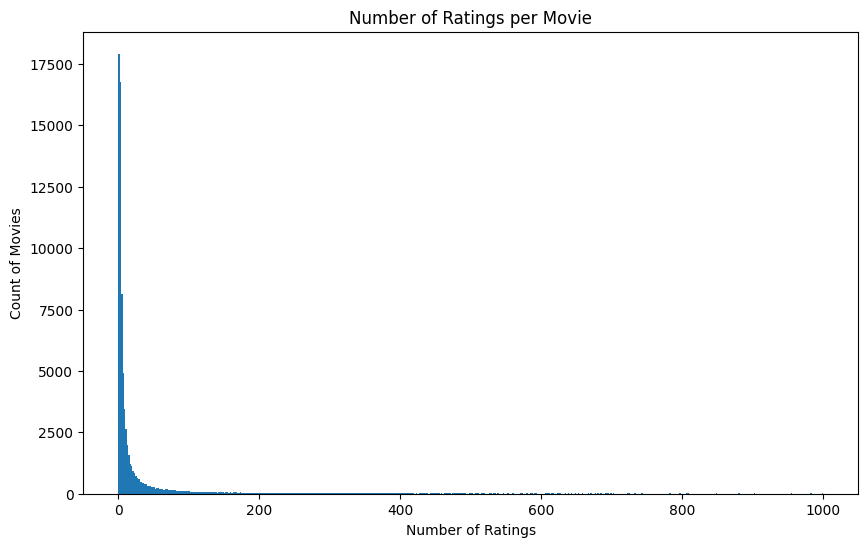

In [29]:
ratings_per_movie = ratings.groupby('movieId').size()
plt.figure(figsize=(10, 6))
plt.hist(ratings_per_movie, bins=500, range=(0, 1000))
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Movies')
plt.show()

Text is developing!

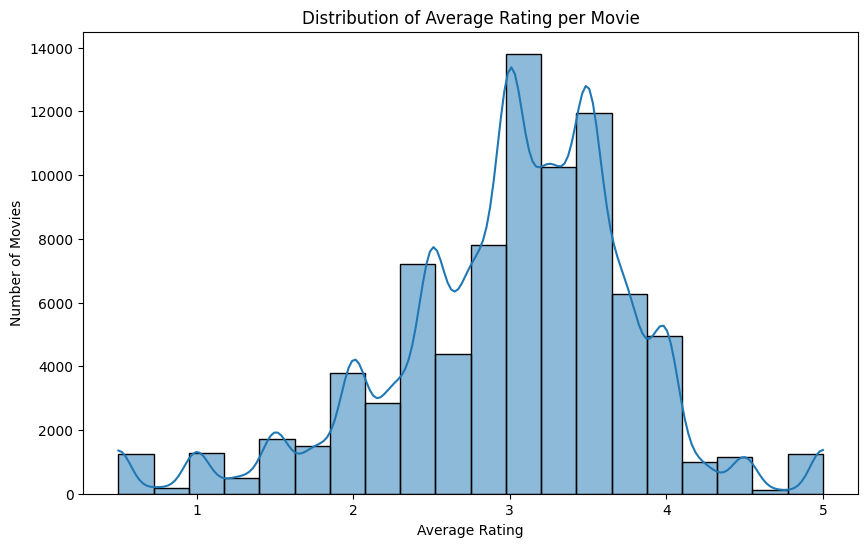

In [13]:
avg_rating_per_movie = ratings.groupby('movieId')['rating'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(avg_rating_per_movie, bins=20, kde=True)
plt.title('Distribution of Average Rating per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.show()

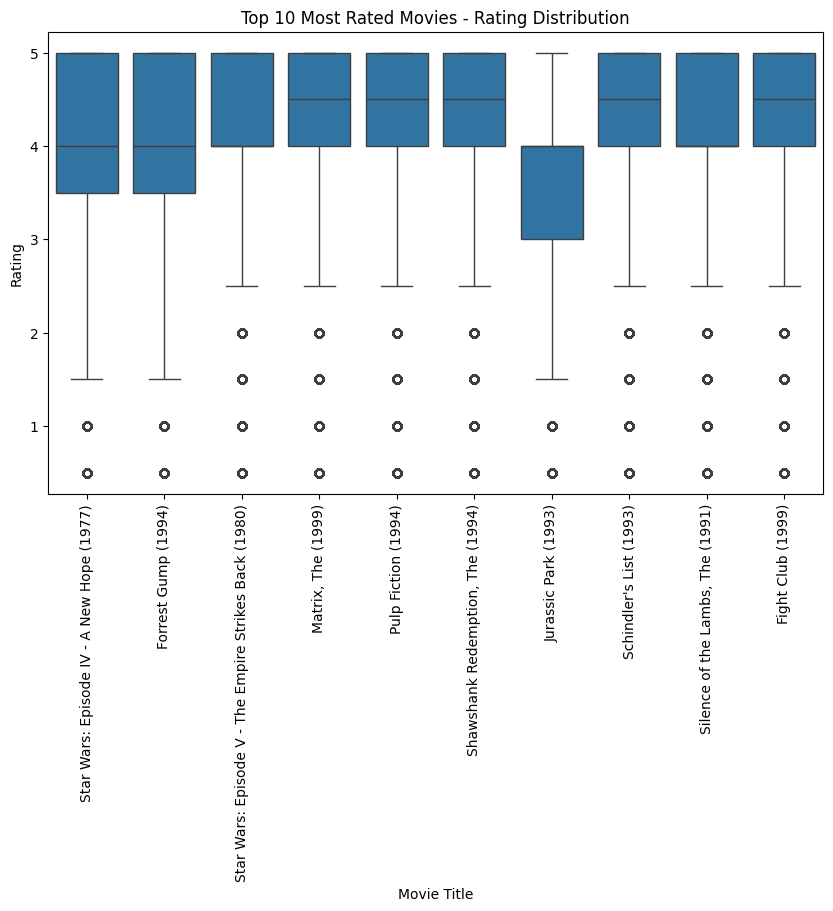

In [14]:
top_rated_movies = ratings_per_movie.nlargest(10).index
top_movies = movies[movies['movieId'].isin(top_rated_movies)]

top_movies_ratings = merged_data[merged_data['movieId'].isin(top_rated_movies)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='title', y='rating', data=top_movies_ratings)
plt.xticks(rotation=90)
plt.title('Top 10 Most Rated Movies - Rating Distribution')
plt.xlabel('Movie Title')
plt.ylabel('Rating')
plt.show()

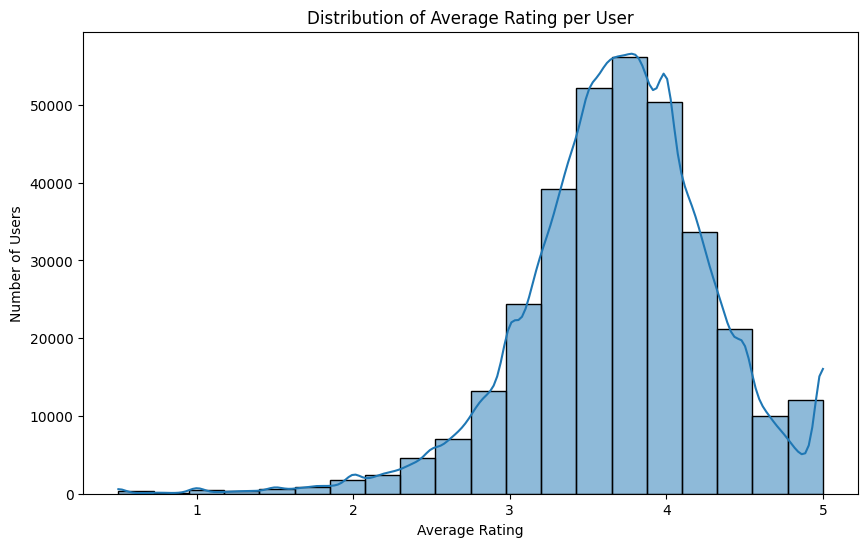

In [15]:
avg_rating_per_user = ratings.groupby('userId')['rating'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(avg_rating_per_user, bins=20, kde=True)
plt.title('Distribution of Average Rating per User')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.show()